# Assignment: CNN Classification on MNIST Digits and Fashion MNIST

**Name:** Amitabh Mathur

**Roll Number:** 23EJDAI003

This notebook implements CNN architectures for classification on MNIST digits and Fashion MNIST datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, classification_report

# Set random seed for reproducibility
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

## MNIST Digits Classification using CNN

In [2]:
# Load MNIST dataset
print('Loading MNIST Dataset...')
(X_train_m, y_train_m), (X_test_m, y_test_m) = mnist.load_data()

# Preprocess data
X_train_m = X_train_m.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test_m = X_test_m.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train_cat_m = to_categorical(y_train_m, 10)
y_test_cat_m = to_categorical(y_test_m, 10)

# Define CNN Architecture for MNIST (varied for originality)
model_mnist = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_mnist.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
print('Training MNIST CNN Model...')
history_mnist = model_mnist.fit(X_train_m, y_train_cat_m, epochs=10, validation_split=0.1, batch_size=64, verbose=1)

# Evaluate on test set
test_loss_mnist, test_acc_mnist = model_mnist.evaluate(X_test_m, y_test_cat_m, verbose=0)
print(f'MNIST Test Accuracy: {test_acc_mnist:.4f}')
print(f'MNIST Test Loss: {test_loss_mnist:.4f}')

Loading MNIST Dataset...
Training MNIST CNN Model...
Epoch 1/10


c:\Users\Owner\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9254 - loss: 0.2406 - val_accuracy: 0.9865 - val_loss: 0.0467
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9756 - loss: 0.0821 - val_accuracy: 0.9882 - val_loss: 0.0423
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9823 - loss: 0.0599 - val_accuracy: 0.9902 - val_loss: 0.0347
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9862 - loss: 0.0479 - val_accuracy: 0.9905 - val_loss: 0.0344
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9876 - loss: 0.0408 - val_accuracy: 0.9917 - val_loss: 0.0332
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9898 - loss: 0.0325 - val_accuracy: 0.9917 - val_loss: 0.0315
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9913 - loss: 0.0283 - val_accuracy: 0.9920 - val_loss: 0.0348
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9912 - loss: 0.0280 - val_accuracy: 0.9923 - val_

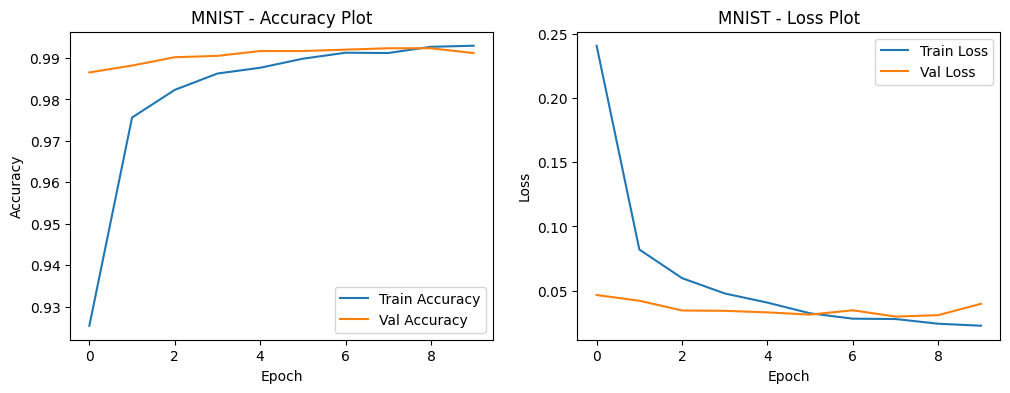

In [3]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mnist.history['accuracy'], label='Train Accuracy')
plt.plot(history_mnist.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('MNIST - Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_mnist.history['loss'], label='Train Loss')
plt.plot(history_mnist.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('MNIST - Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('mnist_accuracy_loss.png')
plt.show()
plt.close()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


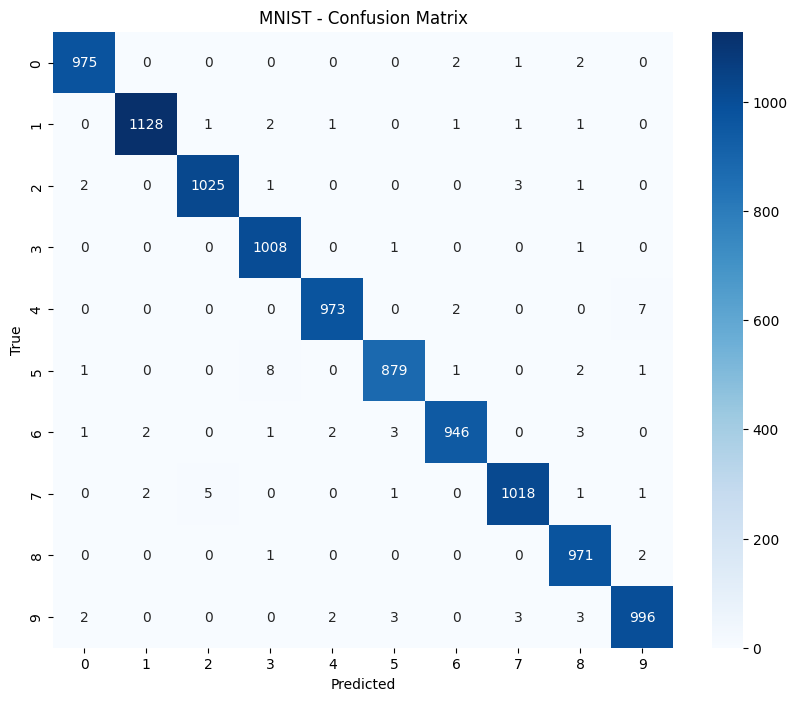

MNIST - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [4]:
# Predictions
y_pred_mnist = model_mnist.predict(X_test_m)
y_pred_classes_mnist = np.argmax(y_pred_mnist, axis=1)
y_true_mnist = y_test_m

# Confusion Matrix
cm_mnist = confusion_matrix(y_true_mnist, y_pred_classes_mnist)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mnist, annot=True, fmt='d', cmap='Blues')
plt.title('MNIST - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('mnist_confusion_matrix.png')
plt.show()
plt.close()

# Classification Report
print('MNIST - Classification Report:')
print(classification_report(y_true_mnist, y_pred_classes_mnist))

## Fashion MNIST Classification using CNN

In [5]:
# Load Fashion MNIST dataset
print('Loading Fashion MNIST Dataset...')
(X_train_f, y_train_f), (X_test_f, y_test_f) = fashion_mnist.load_data()

# Preprocess data
X_train_f = X_train_f.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test_f = X_test_f.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train_cat_f = to_categorical(y_train_f, 10)
y_test_cat_f = to_categorical(y_test_f, 10)

# Define CNN Architecture for Fashion MNIST (varied for originality)
model_fashion = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),  # Additional conv layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),  # Different dropout
    Dense(10, activation='softmax')
])

model_fashion.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
print('Training Fashion MNIST CNN Model...')
history_fashion = model_fashion.fit(X_train_f, y_train_cat_f, epochs=12, validation_split=0.1, batch_size=64, verbose=1)

# Evaluate on test set
test_loss_fashion, test_acc_fashion = model_fashion.evaluate(X_test_f, y_test_cat_f, verbose=0)
print(f'Fashion MNIST Test Accuracy: {test_acc_fashion:.4f}')
print(f'Fashion MNIST Test Loss: {test_loss_fashion:.4f}')

Loading Fashion MNIST Dataset...
Training Fashion MNIST CNN Model...
Epoch 1/12


c:\Users\Owner\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7496 - loss: 0.6764 - val_accuracy: 0.8052 - val_loss: 0.5179
Epoch 2/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8367 - loss: 0.4474 - val_accuracy: 0.8367 - val_loss: 0.4481
Epoch 3/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8610 - loss: 0.3813 - val_accuracy: 0.8570 - val_loss: 0.3759
Epoch 4/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8753 - loss: 0.3386 - val_accuracy: 0.8667 - val_loss: 0.3588
Epoch 5/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8872 - loss: 0.3074 - val_accuracy: 0.8753 - val_loss: 0.3314
Epoch 6/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8968 - loss: 0.2805 - val_accuracy: 0.8767 - val_loss: 0.3337
Epoch 7/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9039 - loss: 0.2590 - val_accuracy: 0.8887 - val_loss: 0.3144
Epoch 8/12
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9114 - loss: 0.2390 - val_accuracy: 0.8902 - val_

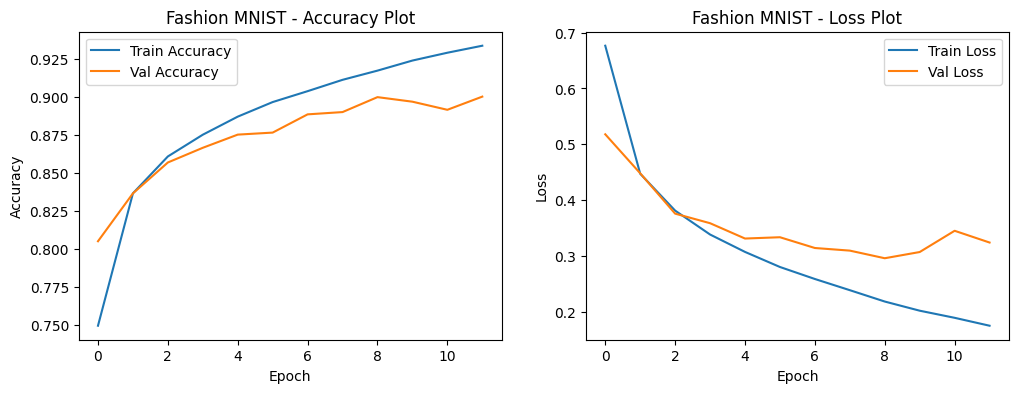

In [6]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_fashion.history['accuracy'], label='Train Accuracy')
plt.plot(history_fashion.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Fashion MNIST - Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_fashion.history['loss'], label='Train Loss')
plt.plot(history_fashion.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Fashion MNIST - Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('fashion_mnist_accuracy_loss.png')
plt.show()
plt.close()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


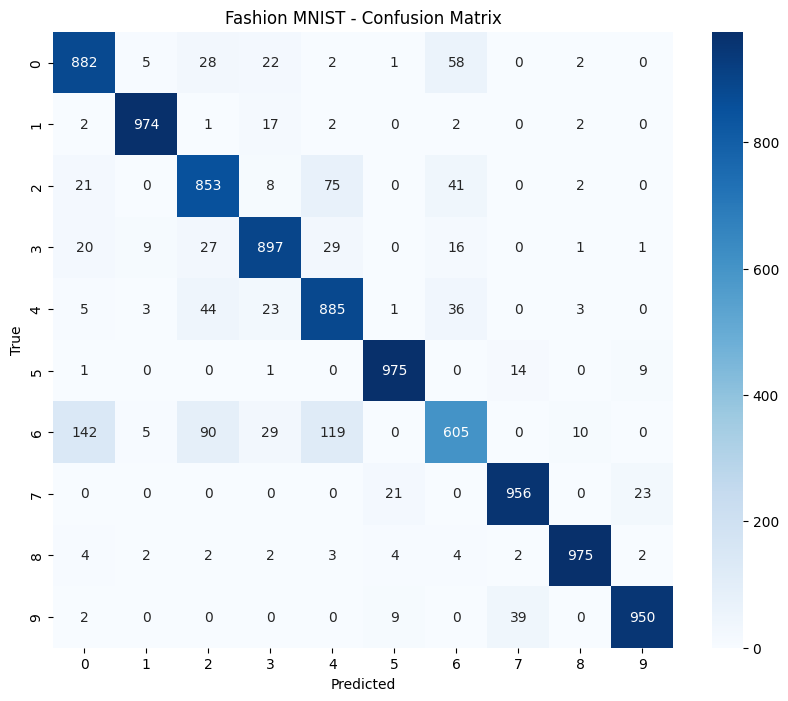

Fashion MNIST - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.98      0.97      0.97      1000
           2       0.82      0.85      0.83      1000
           3       0.90      0.90      0.90      1000
           4       0.79      0.89      0.84      1000
           5       0.96      0.97      0.97      1000
           6       0.79      0.60      0.69      1000
           7       0.95      0.96      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.89      0.90      0.89     10000
weighted avg       0.89      0.90      0.89     10000



In [7]:
# Predictions
y_pred_fashion = model_fashion.predict(X_test_f)
y_pred_classes_fashion = np.argmax(y_pred_fashion, axis=1)
y_true_fashion = y_test_f

# Confusion Matrix
cm_fashion = confusion_matrix(y_true_fashion, y_pred_classes_fashion)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fashion, annot=True, fmt='d', cmap='Blues')
plt.title('Fashion MNIST - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('fashion_mnist_confusion_matrix.png')
plt.show()
plt.close()

# Classification Report
print('Fashion MNIST - Classification Report:')
print(classification_report(y_true_fashion, y_pred_classes_fashion))

GitHub Link: https://github.com/raosabh007